<h1>Used Car Price Factors - What drives the price of a car?</h1>

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

<b>Selling a used car for the right price is dependent on a variety of factors. The used car dealers might price the car too high or too low there by losing on a potential sale or ending up with lower profits. </b>

<b>The car, it's model, features and condition will all play a role in determining the price. First we need to collect all the data atttibutes for the car and perform feature engineering. </b>

<b>Since the question we are trying to answer is what features determine the price of a used car, we need to first understand each of the available features, transform the data as needed and perform exploratory data analysis.</b>

<b>Finally we need to use the ML Models to determine what features/factors impact the price of a used car and provide recommendations to a used car dealership.</b>

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

<b>The original dataset is from Kaggle, that contained information about 3 million used cars which has been trimmed down to 4,26,880 cars to ensure speed of processing.</b> 
    
<b>This consists of all relevant information about the used car such as price, condition, manufacturer etc., for a total of 18 features associated with a used car listing. Below we will dive deeper into the dataset and get some exploratory insights.</b>


In [1]:
# import all the required modules
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy as sp
import scipy.stats as sps

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from scipy.stats import boxcox
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from statistics import mode
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from numpy.linalg import matrix_power
from numpy.linalg import multi_dot
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn import linear_model
import category_encoders as ce

from scipy.stats import t
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.compose import TransformedTargetRegressor
from scipy import stats

from dython import nominal
from dython.nominal import associations

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the vehicles data in a data frame
vehicles=pd.read_csv("data/vehicles.csv")

#Check data
vehicles.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [3]:
# Check the various features of the DataFrame
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [4]:
# Check the shape of the Data Frame
vehicles.shape

(426880, 18)

Text(0, 0.5, '# of Null Values')

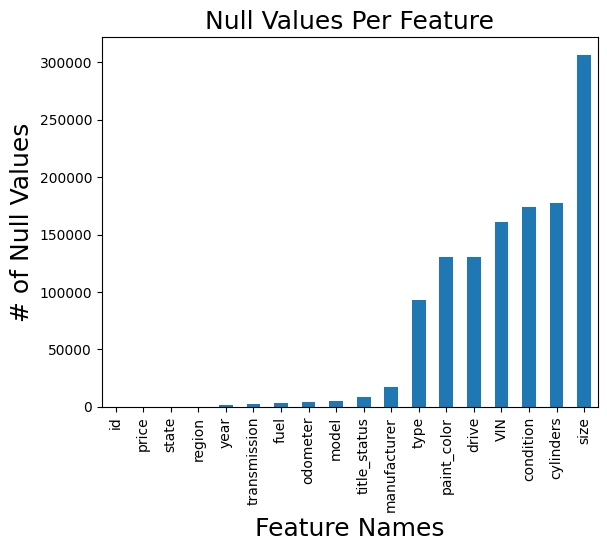

In [5]:
#Determine the total null values present in each feature
vehicles.isnull().sum().sort_values().plot(kind = 'bar')
plt.title('Null Values Per Feature', fontsize = 18)
plt.xlabel('Feature Names', fontsize=18)
plt.ylabel('# of Null Values', fontsize=18)

In [6]:
#Total null values in each of the features
vehicles.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [7]:
#Understand the price data
vehicles.price.describe()

count    4.268800e+05
mean     7.519903e+04
std      1.218228e+07
min      0.000000e+00
25%      5.900000e+03
50%      1.395000e+04
75%      2.648575e+04
max      3.736929e+09
Name: price, dtype: float64

<AxesSubplot: xlabel='odometer', ylabel='price'>

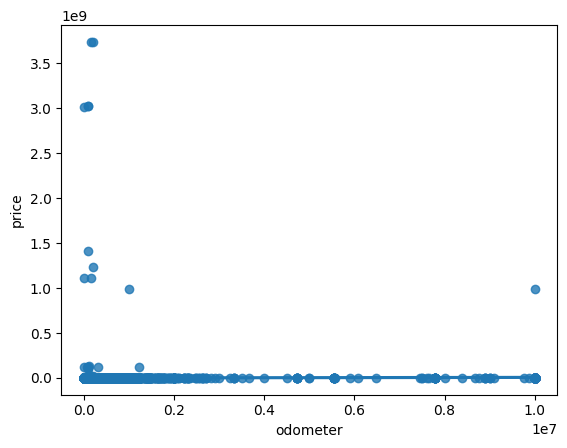

In [8]:
#Figure out the correlaion between Odometer and Price
sns.regplot(x="odometer",y="price",data=vehicles)

<AxesSubplot: xlabel='year', ylabel='price'>

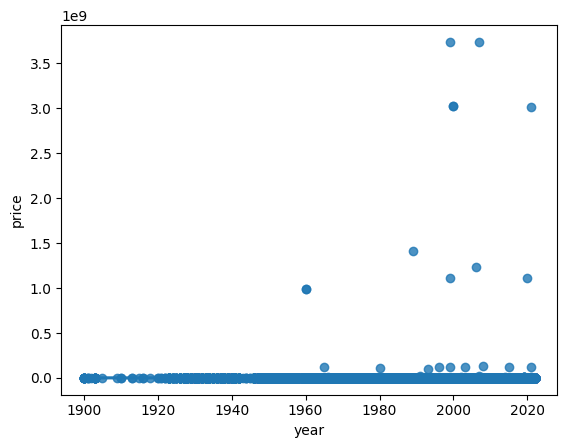

In [9]:
#Figure out the correlaion between Year and Price
sns.regplot(x="year",y="price",data=vehicles)

<AxesSubplot: xlabel='year', ylabel='odometer'>

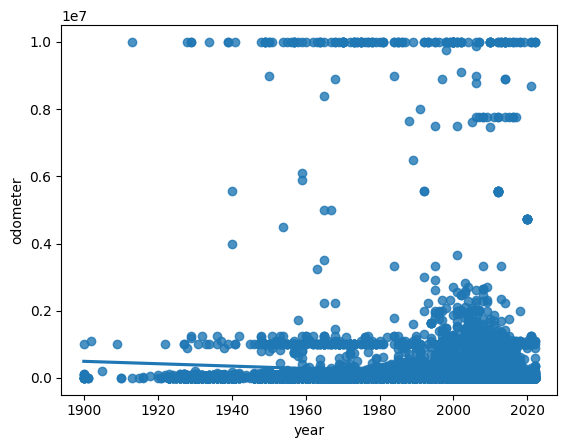

In [10]:
#Figure out the correlaion between Odometer and Year
sns.regplot(x="year",y="odometer",data=vehicles)

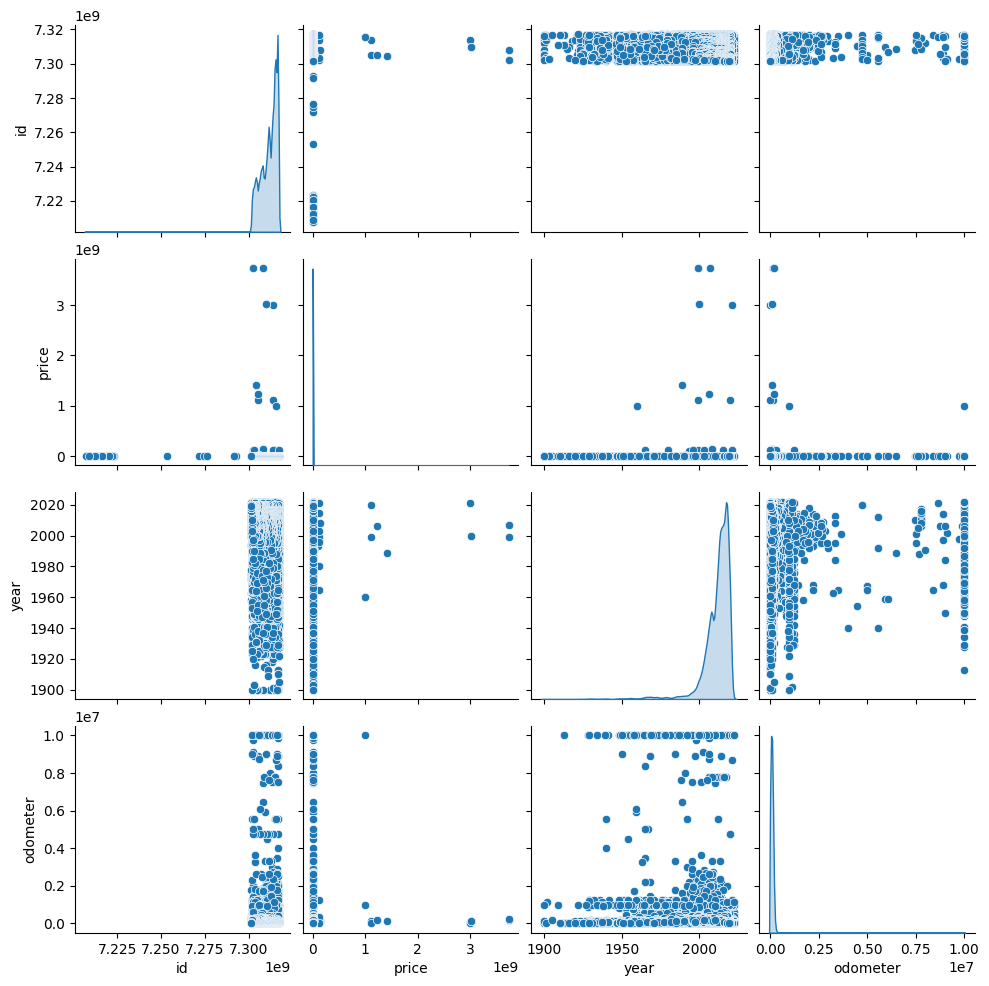

In [11]:
#Determine the correlation between the various features
sns.pairplot(data = vehicles, diag_kind = 'kde')

<b>Findings:<p>
Based on the above analysis the DataFrame has 17 features of which 4 are numerical columns and the rest are categorical. 14 of those features have null values. <p>
Price has a mean value of 75,000 USD with a median value of 13,950 USD.

</b>

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

<b>Remove features from the dataset that has a lot of null values</b>
<p>
    Based on the analysis done in the above section and as per the Null Values Per Feature plot it is very clear that the feature "Size" has a lot of null values. Let's drop the "Size" feature.
    
<p>Also, dropping the features that do not add value for the model like Vehicle ID and Vehicle VIN.
    
<p> Perform Nominal encoding of Condition and Title features

In [12]:
#Drop features that are not needed
vehicles_clean = vehicles.drop(columns = ['size', 'id', 'VIN'])

#Drop null values
vehicles_clean.dropna(inplace = True)
vehicles_clean.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al
32,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black,al
33,auburn,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,4wd,pickup,silver,al
34,auburn,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,truck,grey,al
35,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,4wd,pickup,red,al


In [13]:
#Perform Ordinal Encoding of the Title Feature
# Assign values of 1 through 6 for the values in Title Status
title_encode = {"parts only":1, "missing":2, "lien":3, "salvage":4, "rebuilt":5, "clean":6}
vehicles_clean['title_info'] = vehicles_clean['title_status'].replace(title_encode)
vehicles_clean.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,title_info
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al,6
32,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black,al,6
33,auburn,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,4wd,pickup,silver,al,6
34,auburn,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,truck,grey,al,6
35,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,4wd,pickup,red,al,6


In [14]:
#Perform Ordinal Encoding of the Condition Features
# Assign values of 1 through 6 for the values in Condition Status
condition_encode = {"salvage":1, "fair":2, "good":3, "excellent":4, "like new":5, "new":6}
vehicles_clean['condition_info'] = vehicles_clean['condition'].replace(condition_encode)
vehicles_clean.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,title_info,condition_info
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al,6,4
32,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black,al,6,3
33,auburn,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,4wd,pickup,silver,al,6,3
34,auburn,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,truck,grey,al,6,4
35,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,4wd,pickup,red,al,6,3


In [15]:
#Determine count of number of cylinders feature
print(vehicles_clean['cylinders'].value_counts())

6 cylinders     43101
4 cylinders     35785
8 cylinders     34721
5 cylinders       923
10 cylinders      875
other             308
3 cylinders       215
12 cylinders       60
Name: cylinders, dtype: int64


In [16]:
#Replace number of cylinders with the numeric values
cylinders_numeric = {"cylinders": {"4 cylinders": 4, "6 cylinders": 6, "5 cylinders": 5, "8 cylinders": 8,
                                  "12 cylinders": 12, "3 cylinders": 3, "10 cylinders":10 }}

vehicles_clean = vehicles_clean.replace(cylinders_numeric)
vehicles_clean.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,title_info,condition_info
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6,gas,128000.0,clean,automatic,rwd,truck,black,al,6,4
32,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8,gas,68696.0,clean,other,4wd,pickup,black,al,6,3
33,auburn,34590,2016.0,chevrolet,silverado 1500 double,good,6,gas,29499.0,clean,other,4wd,pickup,silver,al,6,3
34,auburn,35000,2019.0,toyota,tacoma,excellent,6,gas,43000.0,clean,automatic,4wd,truck,grey,al,6,4
35,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6,gas,17302.0,clean,other,4wd,pickup,red,al,6,3


<p><b>Generate Correlation between features 

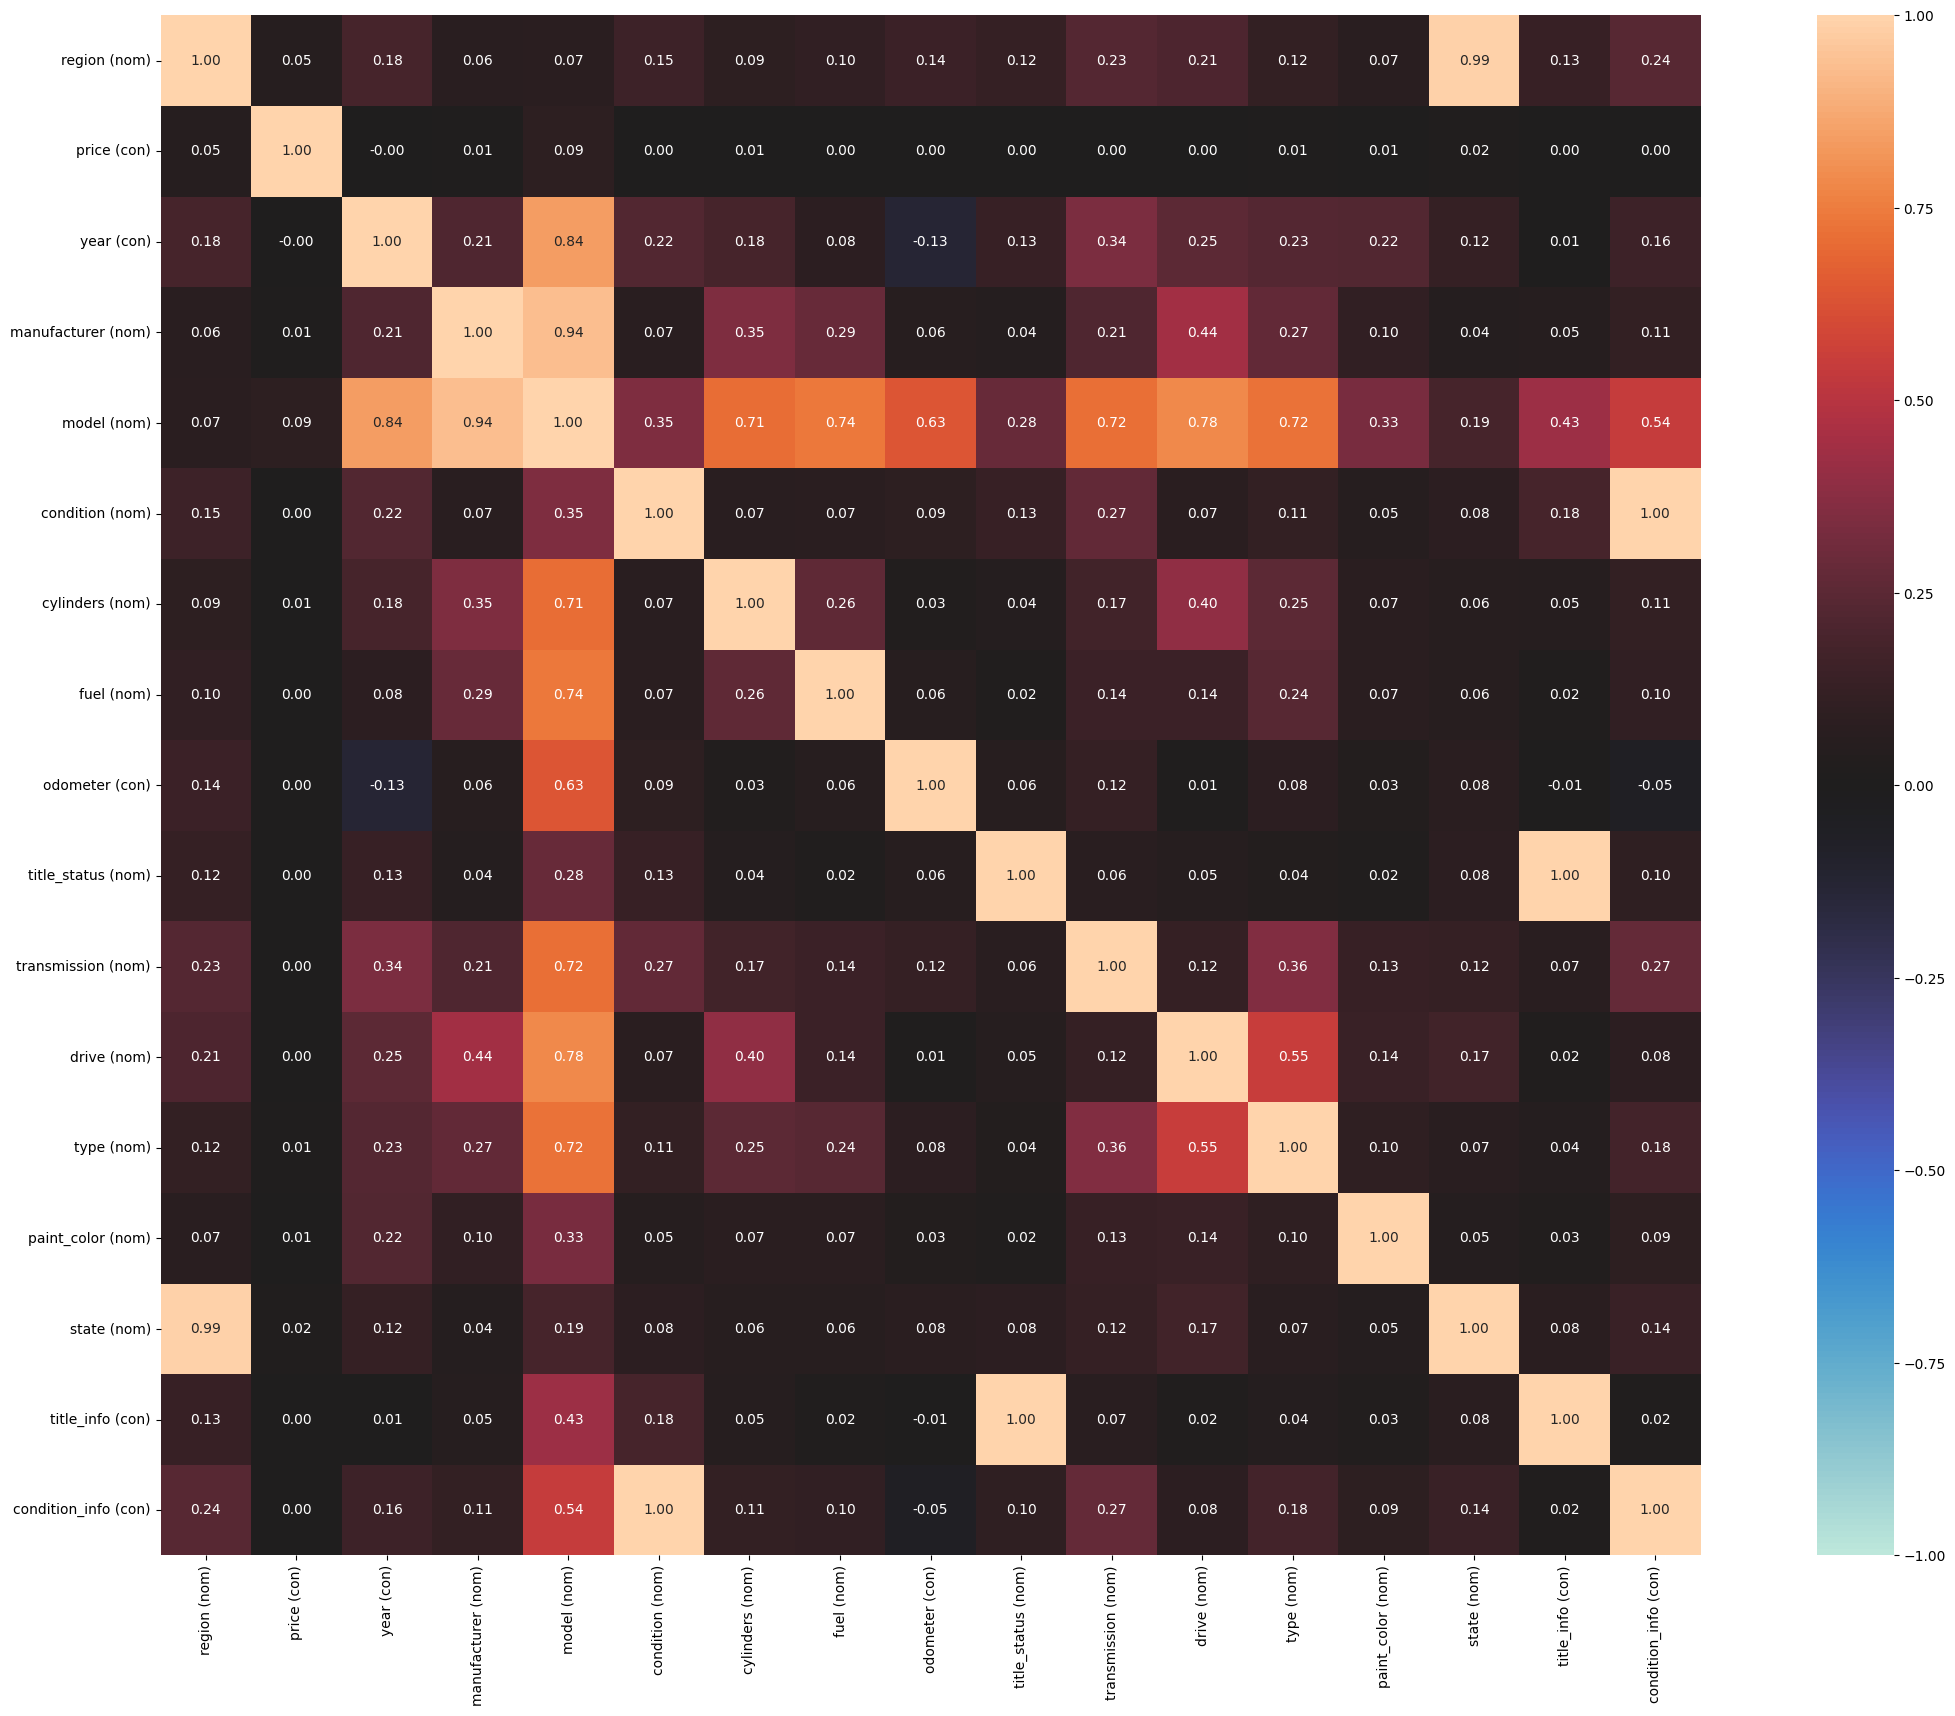

In [17]:
#Generate nominal correlation for all the features
nominal.associations(vehicles_clean,figsize=(30,20),mark_columns=True);


In [18]:
#Perform leave one out encoding of the remaining categorical features
loo_encoder = ce.LeaveOneOutEncoder(return_df = True)
vehicles_encoded = loo_encoder.fit_transform(vehicles_clean.drop(columns = ['condition', 'title_status']), vehicles_clean['price'])
vehicles_encoded.head()

,region,price,year,manufacturer,model,cylinders,fuel,odometer,transmission,drive,type,paint_color,state,title_info,condition_info
31,25736.923077,15000,2013.0,70899.624048,19905.144737,18644.335081,53286.329422,128000.0,68559.678788,58678.411806,29908.425602,23651.526864,19131.417865,6,4
32,25403.846154,27990,2012.0,46857.090462,27990.000000,168656.362356,53286.207086,68696.0,31309.737716,100702.833235,412552.908793,23650.938895,19121.584406,6,3
33,25234.615385,34590,2016.0,17685.758750,33475.407166,18643.880557,53286.144929,29499.0,31309.200781,100702.698763,412552.393852,235284.221488,19116.588191,6,3
34,25224.102564,35000,2019.0,384163.817308,18145.962590,18643.871044,53286.141068,43000.0,68559.469385,100702.690410,29907.142316,23603.727404,19116.277820,6,4
35,25352.564103,29990,2016.0,17686.017192,28513.840909,18643.987285,53286.188250,17302.0,31309.575008,100702.792486,412552.752750,16588.222355,19120.070401,6,3


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

<p><b>Build Train Test split dataset and train using Ridge Regression model</b></p>

In [19]:
#Create Train test split data
X = vehicles_encoded.drop(columns = ["price"])
y = vehicles_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [20]:
#View Training and Testing Data Sample
print("Train Data Sample")
print(X_train.head())
print("\nTest Data Sample")
print(X_test.head())


Train Data Sample
              region    year  manufacturer         model      cylinders  \
347611  16711.407500  2005.0  17078.261897   4139.142857   18644.546682   
110998  15195.101449  2007.0  15014.105047  19917.678571  168656.707949   
257004  10250.707291  2010.0  70899.913316   8620.733333   18644.474292   
76949   12623.466387  2007.0   9373.942721   4082.850000   18644.544014   
256617  10247.472252  2012.0   9566.595617   9310.675676    9727.705203   

                fuel  odometer  transmission          drive          type  \
347611  53286.415311  125102.0  68559.774275  100703.283715  13978.806107   
110998  53286.320089  103000.0  68559.668412   58678.375495  13547.825510   
257004  53286.385928   94000.0  68559.741608  100703.220146  13548.080284   
76949   53286.414228  143584.0  68559.773071  100703.281372  13548.189796   
256617  53286.357929  104082.0  68559.710481   12453.911592   8633.344098   

          paint_color         state  title_info  condition_info  
34

In [21]:
#Use Standard scaler to scale the model
ridge_reg_model_1 = Pipeline([('scale', StandardScaler()), ('ridge', Ridge(random_state = 42))])

hyperparameters = {'ridge__alpha': 10**np.linspace(-5, 4, 100)}

In [22]:
#Use GridSearchCV to find the optimial alpha value

find_best_model = GridSearchCV(estimator = ridge_reg_model, param_grid = hyperparameters, cv = 10)

NameError: name 'ridge_reg_model' is not defined

In [ ]:
#Train the model

find_best_model.fit(X_train, y_train)
find_best_model.best_params_

In [ ]:
#Determine the best model
selected_model = find_best_model.best_estimator_

In [ ]:
#Train the model selected by GridSearchCV
selected_model.fit(X_train, y_train)

In [ ]:
#Find coefficients for each feature
features = selected_model[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    selected_model[-1].coef_,
    columns = ["coefficients"],
    index = features
)

coefs.sort_values('coefficients')

In [ ]:
#Find the train and test MSE

train_mse = mean_squared_error(y_train, selected_model.predict(X_train))

# Test mse
test_mse = mean_squared_error(y_test, selected_model.predict(X_test))

print('training mse: ', train_mse)
print('test mse: ', test_mse)

<p><b>Use a basic Ridge Regression model</b></p>

In [ ]:
#Choose from a list of alpha values
alphas = [0.001, 1.0, 10.0, 100.0]
coef_list = []

for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train, y_train)
    coef_list.append(list(ridge.coef_))
    
print('Coefficients for Basic Ridge Regression Model:')
list(zip(X_train.columns, coef_list[-1]))

In [ ]:
#Find the train and test MSE for the basic Ridge Regression Model

train_mse_basic_ridge = mean_squared_error(y_train, ridge.predict(X_train))

# Test mse
test_mse_basic_ridge = mean_squared_error(y_test, ridge.predict(X_test))

print('training mse: ', train_mse_basic_ridge)
print('test mse: ', test_mse_basic_ridge)

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

<p><b>Our business goal is to determine what features determine the value of a used car. 

Based on the model recommendations we see clearly that the following factors heavily contribute to the used car price.

1. Car condition
2. Number of cylinders
3. Whether it has a title
4. Odometer miles


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

<p><b>

To determine and maximize the price of a car it is essential to focus on the following key features:
    
    1. Car Condition: what condition the car is in (Excellent, Like New, New, Good, Fair or Salvage) with newer or better condition the car is, the better the price.
    
    2. Number of Cylinders: how many cylinders the car has (3, 4, 5, 6, 8, 19 or 12) with higher number of cylinders getting more price.
    
    3. Whether the car has a valid title or not. Cars with a valid title will get better price.
    
    4. Odometer miles: The lesser the odomoeter miles the better the price of the car.